In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("danger_level.csv")


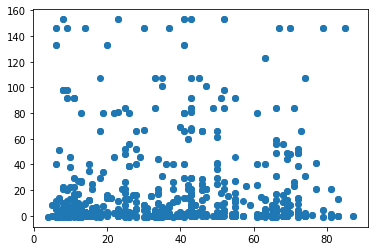

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 0 to 1073
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   processo_numero         990 non-null    object 
 1   solicitacao_data        990 non-null    object 
 2   solicitacao_hora        990 non-null    object 
 3   solicitacao_descricao   990 non-null    object 
 4   solicitacao_bairro      990 non-null    object 
 5   solicitacao_localidade  990 non-null    object 
 6   solicitacao_endereco    990 non-null    object 
 7   processo_ocorrencia     990 non-null    object 
 8   confirmado              990 non-null    int64  
 9   latitude                990 non-null    float64
 10  longitude               990 non-null    float64
 11  cond                    990 non-null    bool   
 12  em_recife               990 non-null    int64  
 13  rain_hour               990 non-null    float64
 14  rain_day                990 non-null    f

In [5]:
df.dropna(inplace=True)

plt.scatter(df['altitude'], df['rain_day'])
plt.show()
df.info()


In [6]:
df['confirmado'].sum()

318

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
def label_ground_int(row):
    match row['ground_type']:
        case "LVd2":
            return 0 
        case "LVd4":
            return 1 
        case "A2":
            return 2 
        case "URBANO":
            return 3 
        case "PV1":
            return 4 
        case "HP":
            return 5 
        case "AGUA":
            return 6 
        case "ILHA":
            return 7 
def label_danger_int(row):
    match row['danger_level']:
        case 'Baixa':
            return 0 
        case 'Média':
            return 1 
        case 'Alta':
            return 2 
        

In [14]:
df['ground_type_int'] = df.apply(lambda row: label_ground_int(row), axis=1)
df['danger_level_int'] = df.apply(lambda row: label_danger_int(row), axis=1)
df['danger_level'].unique()

array(['Baixa', 'Média', 'Alta'], dtype=object)

In [34]:
regression_model = LinearRegression()
x = df[['altitude', 'rain_hour','rain_day', 'danger_level_int', 'ground_type_int']]
y = df['confirmado']
regression_model.fit(x, y)
y_predicted = regression_model.predict(x)

rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Slope:' ,regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Root mean squared error: ', rmse)
print('Score ', regression_model.score(x, y))
print(regression_model.predict([[80, 0, 0, 2, 1]]))




Slope: [ 0.00299053 -0.00848685  0.00255179  0.07771949 -0.02743285]
Intercept: 0.18338409709206502
Root mean squared error:  0.19589203918964626
Score  0.10155647457241934
[0.55063275]


c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
